# Data Analysis and Classification

## Basic Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

### Load `csv`

In [2]:
dataset = pd.read_csv("../data/gauravtopre-bank-customer-churn-dataset.csv")

# Set the display format to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dataset

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Dataset Analysis

Here we will analyze the dataset to understand the data and its structure.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In this case the dataset does not contain any missing values, and has non-numeric type columns "country" and "gender".

Next, we see the descriptive statistics of the dataset.

In [4]:
dataset.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


A clearer view of the null values in the dataset is shown below.
In this case as previously mentioned, there are no missing values in the dataset.

In [5]:
dataset.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Find the amount of unique values in the dataset

In [6]:
dataset.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

Study the correlation between the numeric variables for later use in the classification model.

In [7]:
sns.set_palette("tab10")

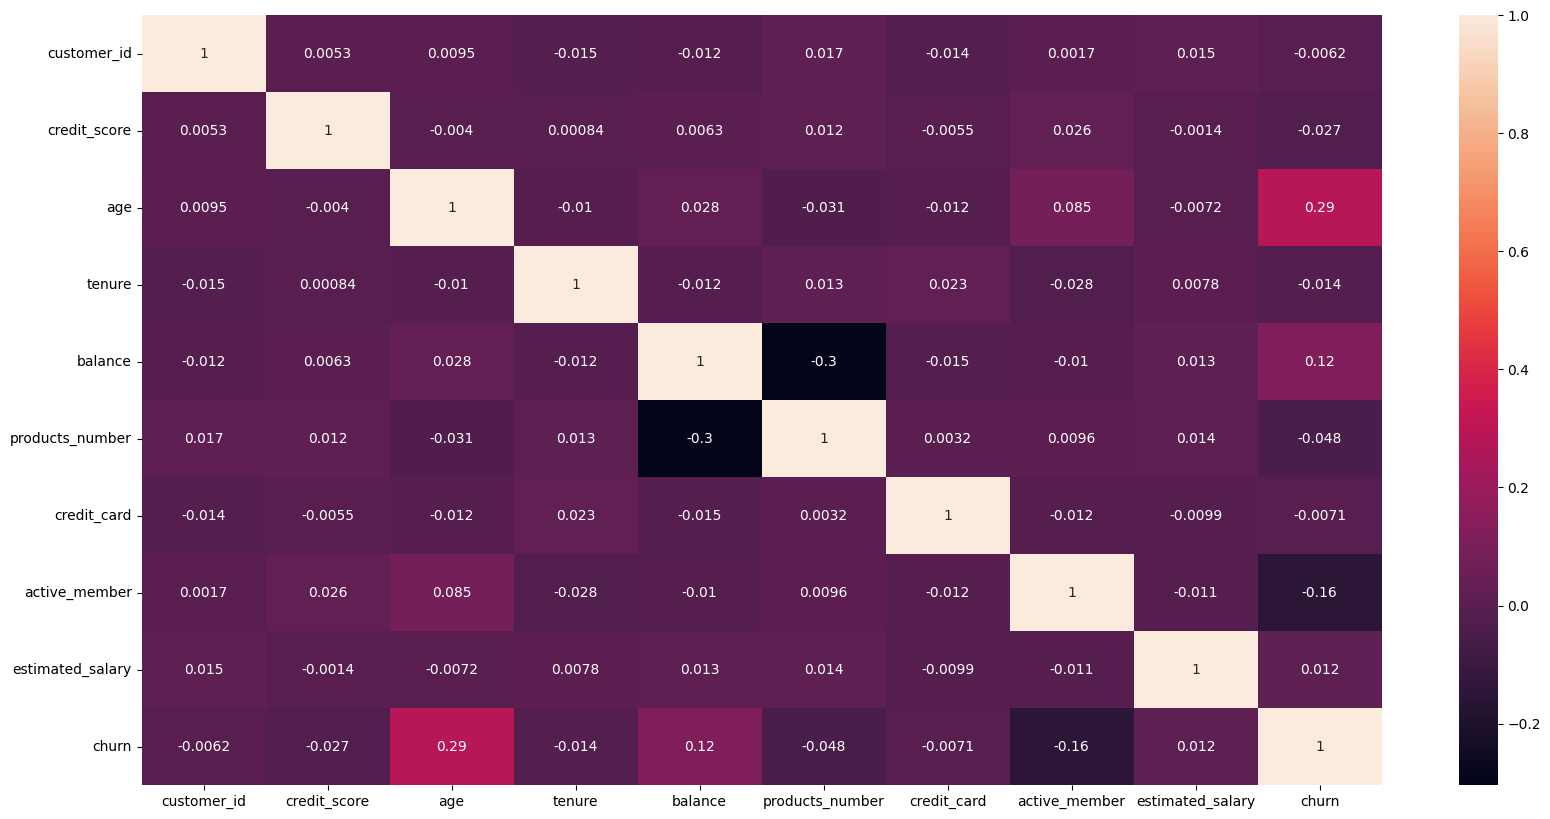

In [8]:
plt.rcParams['figure.figsize'] = (20, 10)

sns.heatmap(dataset.dropna().corr(numeric_only=True), annot=True)

plt.show()

Visualize in pairplots the correlation between important metrics in the dataset,
divided by the `churn`, to see if there is a clear difference between the two classes.

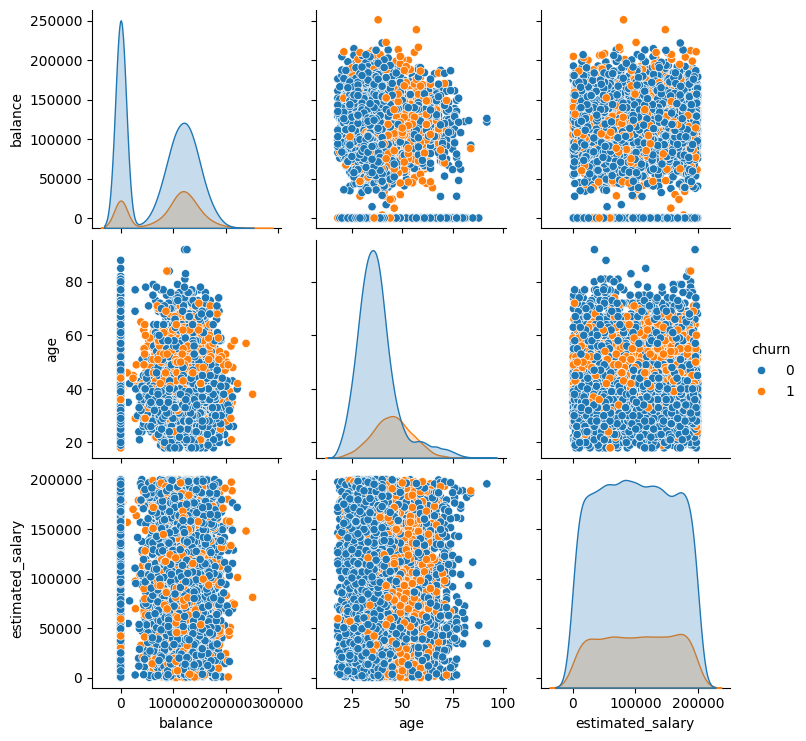

In [9]:
sns.pairplot(dataset, vars=['balance', 'age', 'estimated_salary'], hue='churn')
plt.show()

## Preprocessing

Firstly we remove the `customer_id` column, as it is not relevant for the classification model.

In [10]:
dataset = dataset.drop('customer_id', axis=1)
dataset

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Next we create a pipeline to preprocess the data, which includes:
  - `OneHotEncoder` for the non-numeric columns, that make sense as numeric, in this case `gender`.
  - `StandardScaler` for the numeric columns, to scale the data and make it easier for the model to classify.

After defining the pipeline, we `fit` it to the dataset and transform the data.

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

no_churn_dataset = dataset.drop("churn", axis=1)
num_attributes = no_churn_dataset.select_dtypes(include=["int64", "float64"]).columns.to_numpy()

pipeline = ColumnTransformer(
    [   
        ("text", OneHotEncoder(), ["gender"]),
        ("numeric", StandardScaler(), num_attributes)
    ]
)

preprocessed_dataset = pipeline.fit_transform(no_churn_dataset)
preprocessed_dataset

array([[ 1.        ,  0.        , -0.32622142, ...,  0.64609167,
         0.97024255,  0.02188649],
       [ 1.        ,  0.        , -0.44003595, ..., -1.54776799,
         0.97024255,  0.21653375],
       [ 1.        ,  0.        , -1.53679418, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.        ,  0.        ,  0.60498839, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.        ,  1.        ,  1.25683526, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.        ,  0.        ,  1.46377078, ...,  0.64609167,
        -1.03067011, -1.07636976]])

After preprocessing the data, we split the dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_dataset, dataset["churn"], test_size=0.2, random_state=42
)

As previously seen in the dataset analysis, the dataset is imbalanced, so we will use the `SMOTE` algorithm to balance the dataset.

In [13]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_test_oversampled, y_test_oversampled = sm.fit_resample(X_test, y_test)

## Train classifier

In this section we will train different classifiers to predict the `churn` of the customers.
And we will evaluate the performance of each classifier to choose the best one.

### SVC

Create the `SVC` classifier, and `fit` it to the training data.

In [14]:
from sklearn.svm import SVC

classifier = SVC(kernel="poly")
classifier.fit(X_train_oversampled, y_train_oversampled)

SVC(kernel='poly')

Create and plot the confusion matrix of the `SVC` classifier.

SVC score: 0.7678904791537026


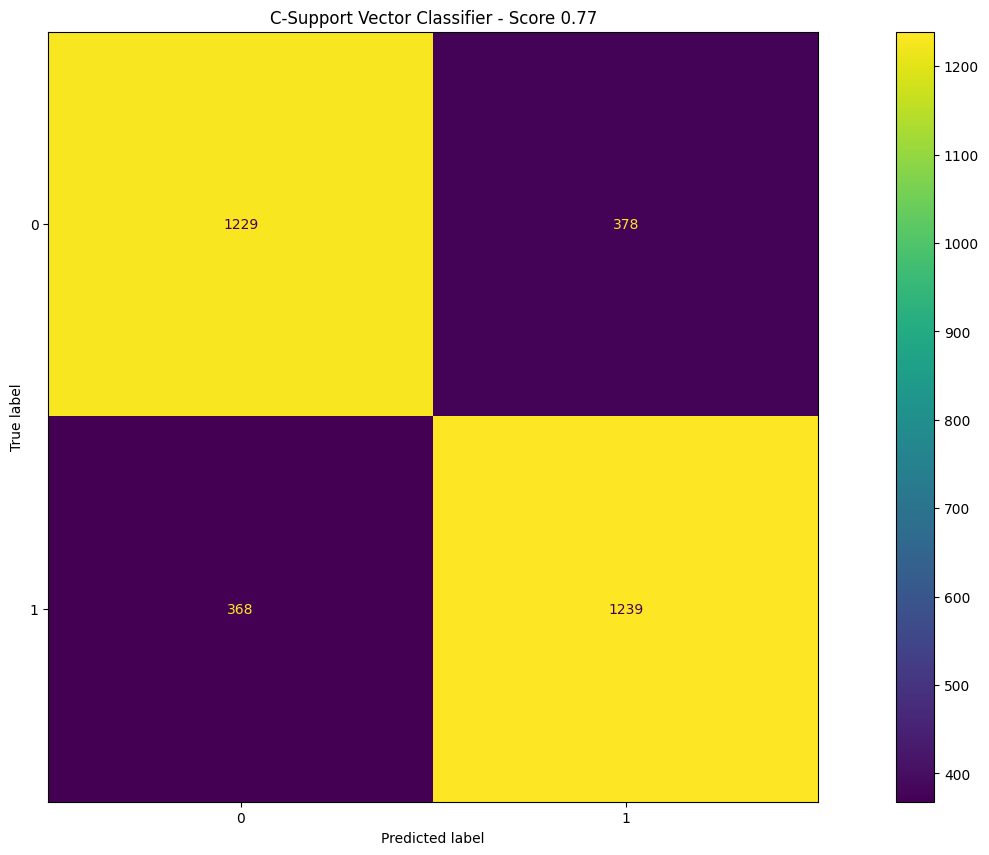

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix = confusion_matrix(y_test_oversampled, classifier.predict(X_test_oversampled))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix, display_labels=classifier.classes_
).plot()

score = classifier.score(X_test_oversampled, y_test_oversampled)
print(f"SVC score: {score}")

plt.title(f"C-Support Vector Classifier - Score {score:.2f}")
plt.show()


Here we can see that the `SVC` classifier has a high accuracy and a score of `0.76`, which is a good result.

#### Prediction Example

In [16]:
input_data = pd.DataFrame(data=None, columns=no_churn_dataset.columns)
input_data.loc[0] = [850,"Spain","Female",43,2,125510.82,1,1,1,79084.1]

input_data = pipeline.transform(input_data)

result = classifier.predict(input_data)
if result[0] == 1:
    print("The customer is likely to churn")
else:
    print("The customer is not likely to churn")

The customer is not likely to churn


#### Export the model

In [17]:
import skops.io as skio

skio.dump(classifier, "classifier.skops")
skio.dump(pipeline, "pipeline.skops")

#### Import the model

In [ ]:
import skops.io as skio

classifier = skio.load("classifier.skops")
pipeline = skio.load("pipeline.skops")